In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wc-7.csv')
# df = pd.read_csv('wc-7-outliers.csv')
# df = pd.read_csv('outliers245.csv')

In [10]:
df = df.drop(columns='country')

feature engineer


In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
new_df = df.drop(columns='year')

In [20]:
y = df['results']
X = df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=2)

In [21]:
X_train.cov()

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,year
goals,0.082191,0.049368,0.007697,0.032109,0.021968,0.003545,0.023114,0.023874,0.029449,0.019896,-0.019189,0.008968,0.003074,-0.002898,0.011185,0.038257,-1.159776
xg,0.049368,0.073228,0.027688,0.053085,0.028359,0.009934,0.025980,0.039146,0.033230,0.028465,-0.025102,0.007601,0.005627,0.004886,0.019083,0.058467,-1.642444
crosses,0.007697,0.027688,0.065998,0.050128,0.027402,0.024558,0.009201,0.027434,0.022545,0.024859,-0.017932,0.000072,0.016934,0.007247,0.016213,0.058310,-0.926297
boxtouches,0.032109,0.053085,0.050128,0.082954,0.037348,0.022495,0.019979,0.044958,0.041513,0.034925,-0.032907,0.007541,0.016840,0.006381,0.020720,0.081256,-1.863474
passes,0.021968,0.028359,0.027402,0.037348,0.118604,0.065152,0.039910,0.074612,0.085563,0.088584,-0.008889,0.039113,-0.000171,0.013619,0.029826,0.050992,-0.739945
progpasses,0.003545,0.009934,0.024558,0.022495,0.065152,0.063352,0.010796,0.034089,0.043573,0.047441,-0.000133,0.024420,0.006347,0.018915,0.015104,0.032662,0.294960
takeons,0.023114,0.025980,0.009201,0.019979,0.039910,0.010796,0.086607,0.057513,0.040648,0.041493,-0.007686,0.017176,-0.015468,0.008310,0.028783,0.032846,-0.754764
progruns,0.023874,0.039146,0.027434,0.044958,0.074612,0.034089,0.057513,0.120498,0.066678,0.060756,-0.017916,0.026538,-0.012987,0.007580,0.022815,0.056375,-1.729863
tackles,0.029449,0.033230,0.022545,0.041513,0.085563,0.043573,0.040648,0.066678,0.119170,0.087392,-0.020271,0.031889,-0.000466,0.005011,0.026099,0.050705,-1.028087
interceptions,0.019896,0.028465,0.024859,0.034925,0.088584,0.047441,0.041493,0.060756,0.087392,0.131573,-0.010984,0.031844,-0.000108,0.019019,0.034864,0.045956,-0.934365


<AxesSubplot:>

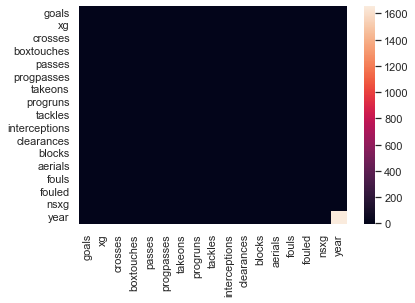

In [22]:
sns.heatmap(X_train.cov())

In [49]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_hat_train = lr2.predict(X_train)
r2_score(y_train, y_hat_train)

0.5498793203047752

In [27]:
columns = df.columns

In [29]:
from itertools import combinations
column_list = X_train.columns
interactions = list(combinations(column_list, 2))

In [30]:
interactions

[('goals', 'xg'),
 ('goals', 'crosses'),
 ('goals', 'boxtouches'),
 ('goals', 'passes'),
 ('goals', 'progpasses'),
 ('goals', 'takeons'),
 ('goals', 'progruns'),
 ('goals', 'tackles'),
 ('goals', 'interceptions'),
 ('goals', 'clearances'),
 ('goals', 'blocks'),
 ('goals', 'aerials'),
 ('goals', 'fouls'),
 ('goals', 'fouled'),
 ('goals', 'nsxg'),
 ('goals', 'year'),
 ('xg', 'crosses'),
 ('xg', 'boxtouches'),
 ('xg', 'passes'),
 ('xg', 'progpasses'),
 ('xg', 'takeons'),
 ('xg', 'progruns'),
 ('xg', 'tackles'),
 ('xg', 'interceptions'),
 ('xg', 'clearances'),
 ('xg', 'blocks'),
 ('xg', 'aerials'),
 ('xg', 'fouls'),
 ('xg', 'fouled'),
 ('xg', 'nsxg'),
 ('xg', 'year'),
 ('crosses', 'boxtouches'),
 ('crosses', 'passes'),
 ('crosses', 'progpasses'),
 ('crosses', 'takeons'),
 ('crosses', 'progruns'),
 ('crosses', 'tackles'),
 ('crosses', 'interceptions'),
 ('crosses', 'clearances'),
 ('crosses', 'blocks'),
 ('crosses', 'aerials'),
 ('crosses', 'fouls'),
 ('crosses', 'fouled'),
 ('crosses', 'ns

In [65]:
interaction_dict = {}
for interaction in interactions:
    X_train_int = X
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
#     lr3.fit(X_train_int, y_train)
#     interaction_dict[lr3.score(X_train_int, y_train)] = interaction

In [33]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('xg', 'year')
('goals', 'fouled')
('xg', 'clearances')
('passes', 'interceptions')
('interceptions', 'fouled')


In [66]:
X_train_int = X
X_train_int['xg_yr'] = X_train_int['xg'] * X_train_int['year']

In [68]:
# lr4 = LinearRegression()
# lr4.fit(X_train_int, y_train)
# lr4.score(X_train_int, y_train)

In [69]:
X_train_int['gl_fl'] = X_train_int['goals'] * X_train_int['fouled']

In [55]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y_train)
lr4.score(X_train_int, y_train)

0.5498793203047752

In [70]:
X_train_int['xg_cl'] = X_train_int['xg'] * X_train_int['clearances']

In [57]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y_train)
lr4.score(X_train_int, y_train)

0.5498793203047752

In [71]:
X_train_int['pass_int'] = X_train_int['passes'] * X_train_int[
    'interceptions']

In [59]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y_train)
lr4.score(X_train_int, y_train)

0.5498793203047752

In [72]:
X_train_int['int_fl'] = X_train_int['interceptions'] * X_train_int[
    'fouled']

In [74]:
# lr4 = LinearRegression()
# lr4.fit(X_train_int, y_train)
# lr4.score(X_train_int, y_train)

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import TheilSenRegressor

In [76]:
reg = TheilSenRegressor(tol=.000001)

In [77]:
X_train_int

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,...,fouls,fouled,nsxg,year,int,xg_yr,gl_fl,xg_cl,pass_int,int_fl
0,-0.410000,0.329231,0.606923,0.713846,0.467692,-0.033077,0.140769,0.609231,0.610769,0.639231,...,-0.016923,0.310769,0.633077,2,1.266154,0.658462,-0.127415,-0.162083,0.298963,0.198653
1,0.553077,0.411538,-0.104615,0.026923,-0.352308,-0.238462,-0.254615,-0.268462,-0.125385,0.029231,...,-0.266154,-0.406154,-0.210000,94,-19.740000,38.684615,-0.224634,-0.049068,-0.010298,-0.011872
2,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,...,0.289231,-0.020000,0.103846,14,1.453846,5.696923,-0.009877,0.039440,0.013100,-0.002600
3,-0.255385,-0.186923,-0.104615,-0.193846,-0.077692,-0.091538,-0.092308,0.160769,-0.179231,-0.326923,...,-0.396154,0.679231,-0.465385,94,-43.746154,-17.570769,-0.173465,-0.012941,0.025399,-0.222056
4,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,...,-0.283077,0.134615,0.170769,14,2.390769,4.221538,-0.012530,-0.084431,-0.069888,-0.037175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.093077,-0.067692,0.272308,0.108462,0.023077,0.133846,-0.214615,0.561538,0.419231,0.098462,...,0.186154,-0.163077,-0.001538,14,-0.021538,-0.947692,0.015179,-0.010154,0.002272,-0.016057
277,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,...,-0.016154,-0.096923,0.890769,82,73.043077,63.455385,-0.085069,-0.091076,0.481212,-0.061807
278,-0.063077,-0.180769,-0.305385,-0.201538,-0.146154,-0.009231,-0.426154,-0.299231,-0.556923,-0.299231,...,-0.016154,-0.032308,-0.256923,90,-23.123077,-16.269231,0.002038,0.002503,0.043734,0.009667
279,0.463846,0.343077,0.029231,-0.026154,0.173077,0.200769,0.092308,0.123077,0.163846,-0.186923,...,0.237692,0.100000,0.160000,18,2.880000,6.175385,0.046385,-0.094742,-0.032352,-0.018692


In [95]:
new_df = X_train_int

In [96]:
new_df['results'] = df['results']

In [97]:
new_df

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,...,fouled,nsxg,year,int,xg_yr,gl_fl,xg_cl,pass_int,int_fl,results
0,-0.410000,0.329231,0.606923,0.713846,0.467692,-0.033077,0.140769,0.609231,0.610769,0.639231,...,0.310769,0.633077,2,1.266154,0.658462,-0.127415,-0.162083,0.298963,0.198653,28
1,0.553077,0.411538,-0.104615,0.026923,-0.352308,-0.238462,-0.254615,-0.268462,-0.125385,0.029231,...,-0.406154,-0.210000,94,-19.740000,38.684615,-0.224634,-0.049068,-0.010298,-0.011872,18
2,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,...,-0.020000,0.103846,14,1.453846,5.696923,-0.009877,0.039440,0.013100,-0.002600,3
3,-0.255385,-0.186923,-0.104615,-0.193846,-0.077692,-0.091538,-0.092308,0.160769,-0.179231,-0.326923,...,0.679231,-0.465385,94,-43.746154,-17.570769,-0.173465,-0.012941,0.025399,-0.222056,21
4,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,...,0.134615,0.170769,14,2.390769,4.221538,-0.012530,-0.084431,-0.069888,-0.037175,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.093077,-0.067692,0.272308,0.108462,0.023077,0.133846,-0.214615,0.561538,0.419231,0.098462,...,-0.163077,-0.001538,14,-0.021538,-0.947692,0.015179,-0.010154,0.002272,-0.016057,24
277,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,...,-0.096923,0.890769,82,73.043077,63.455385,-0.085069,-0.091076,0.481212,-0.061807,5
278,-0.063077,-0.180769,-0.305385,-0.201538,-0.146154,-0.009231,-0.426154,-0.299231,-0.556923,-0.299231,...,-0.032308,-0.256923,90,-23.123077,-16.269231,0.002038,0.002503,0.043734,0.009667,24
279,0.463846,0.343077,0.029231,-0.026154,0.173077,0.200769,0.092308,0.123077,0.163846,-0.186923,...,0.100000,0.160000,18,2.880000,6.175385,0.046385,-0.094742,-0.032352,-0.018692,24


In [112]:
sort_df = df.corr()

In [113]:
sort_df.sort_values('results')

,goals,xg,crosses,boxtouches,passes,progpasses,takeons,progruns,tackles,interceptions,clearances,blocks,aerials,fouls,fouled,nsxg,results,year
goals,1.000000,0.642278,0.165679,0.407847,0.225605,0.088654,0.274043,0.225217,0.259392,0.214749,-0.239460,0.067524,0.061655,-0.064134,0.098556,0.428686,-0.639161,-0.065203
xg,0.642278,1.000000,0.429965,0.686111,0.330644,0.158273,0.357182,0.394097,0.374111,0.313235,-0.382053,0.072662,0.064666,0.008171,0.204792,0.674053,-0.382297,-0.128110
nsxg,0.428686,0.674053,0.711873,0.869170,0.482571,0.403159,0.393943,0.485187,0.475897,0.430517,-0.412332,0.155800,0.180982,0.085872,0.274471,1.000000,-0.290548,-0.076278
boxtouches,0.407847,0.686111,0.663608,1.000000,0.383871,0.289198,0.262846,0.405678,0.405588,0.324130,-0.413997,0.127960,0.256474,0.047396,0.208906,0.869170,-0.275218,-0.135768
progruns,0.225217,0.394097,0.295686,0.405678,0.608565,0.342229,0.544179,1.000000,0.553126,0.449374,-0.144048,0.267841,-0.085525,0.028584,0.256968,0.485187,-0.227910,-0.086799
tackles,0.259392,0.374111,0.248923,0.405588,0.753728,0.503598,0.391053,0.553126,1.000000,0.713455,-0.262682,0.276703,-0.005187,0.020690,0.298744,0.475897,-0.221240,-0.058415
takeons,0.274043,0.357182,0.171757,0.262846,0.395924,0.168935,1.000000,0.544179,0.391053,0.392211,-0.122761,0.178635,-0.131802,0.121632,0.305578,0.393943,-0.193831,-0.080577
passes,0.225605,0.330644,0.267757,0.383871,1.000000,0.738464,0.395924,0.608565,0.753728,0.747297,-0.164576,0.382003,-0.014574,0.076545,0.308737,0.482571,-0.171394,-0.047032
interceptions,0.214749,0.313235,0.258110,0.324130,0.747297,0.556281,0.392211,0.449374,0.713455,1.000000,-0.169320,0.315455,-0.010077,0.135667,0.310120,0.430517,-0.153911,-0.040688
year,-0.065203,-0.128110,-0.056825,-0.135768,-0.047032,0.060179,-0.080577,-0.086799,-0.058415,-0.040688,-0.034062,-0.040507,-0.062720,-0.137746,-0.094618,-0.076278,-0.151525,1.000000


In [102]:
y = new_df['results']
X = new_df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.10, random_state=2)

In [103]:
reg.fit(X_train, y_train)

TheilSenRegressor(tol=1e-06)

In [104]:
pred_test= reg.predict(X_test)

In [105]:
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test,pred_test)))) 
print('R2 : '+str(r2_score(y_test, pred_test)))
print('MSE: '+str(mean_squared_error(y_test, pred_test)))
print('MAE: '+str(mean_absolute_error(y_test, pred_test)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, pred_test)))

RMSE : 7.3156350390828155
R2 : 0.1007178426159383
MSE: 53.51851602505622
MAE: 5.838531268054715
MAPE: 0.6945171004974803


In [106]:
data = {'y_test': y_test, 'y_pred': pred_test}
new_dfs = pd.DataFrame(data)
diff = (new_dfs['y_test'] - (new_dfs['y_pred'])).abs()
new_dfs['diff'] = diff
new_dfs = new_dfs.sort_values(by='diff', ascending=True)

In [107]:
new_dfs

,y_test,y_pred,diff
141,21,21.376011,0.376011
89,11,10.213198,0.786802
245,22,22.866197,0.866197
176,12,10.831022,1.168978
101,19,17.776409,1.223591
7,24,22.563732,1.436268
11,27,25.464312,1.535688
128,26,23.884537,2.115463
250,18,15.241526,2.758474
142,21,18.222976,2.777024
